In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

path="E:\\test2\\data.csv"
data=pd.read_csv(path,header=None,names=["Population","Profit"])

In [18]:

print (data.head())
print(data.describe())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


<Figure size 360x360 with 0 Axes>

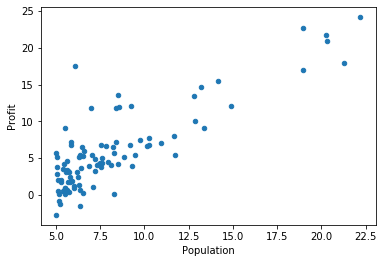

In [19]:
plt.figure(figsize=(5,5))
data.plot(kind="scatter",x="Population",y="Profit")

data.insert(0,'Ones',1)
data.head()

cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

X.head()
y.head()

In [20]:
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

#print('X \n',X)
#print('y \n',y)
#print('theta \n',theta)

In [21]:
def computeCost(X,y,theta):
    z=np.power(((X*theta.T)-y),2)
    print('z \n',z)
    print('m' ,len(X))
    return np.sum(z)/(2*len(X))
#print('computeCost(X,y,theta)=',computeCost(X,y,theta))

In [24]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [ ]:
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

#print('g = ' , g)
#print('cost  = ' , cost[0:50] )
#print('computeCost = ' , computeCost(X, y, g))


In [33]:
#get best fit line 
x=np.linspace(data.Population.min(),data.Population.max(),100)
#print('X =\n',x)
#print('G \n',g)

f=g[0,0]+(g[0,1]*x)
#print('f \n ',f)

Text(0.5, 1.0, 'predicted profit vs. population size ')

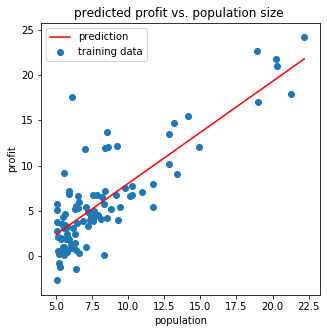

In [34]:

#draw the line 

fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='prediction')
ax.scatter(data.Population,data.Profit,label='training data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('predicted profit vs. population size ')


Text(0.5, 1.0, 'Error vs. training Epoch ')

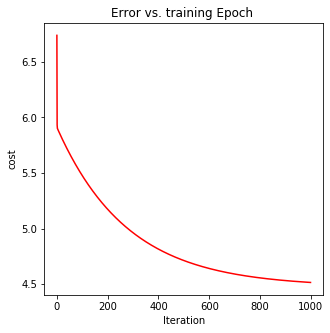

In [35]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('cost')
ax.set_title('Error vs. training Epoch ')

